<a href="https://colab.research.google.com/github/19PA1A0484/liver-patients-in-india/blob/main/19PA1A0484_LIVER_PATIENT_DATA_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT NECCESARY BUILT IN LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

## **IMPORT DATA SET FROM THE LINK LIVER PATIENT DATA SET**
IMPORTING THE DATA

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_dataset.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# **About the dataset**

This data set contains liver patient records and non liver patient records collected from North East of Andhra Pradesh, India. The "Liver_Problem" column is the target variable used to divide groups into liver patient ( Liver_Problem == 1) or not ( Liver_Problem == 2).

Liver_Problem == 1, implies the individual is a liver patient

Liver_Problem == 2, implies the individual is not a liver patient

In [ ]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Liver_Problem'],
      dtype='object')

# **Data Description:**

Age of the patient

Gender of the patient

Total Bilirubin

Direct Bilirubin

Alkaline Phosphotase

Alamine Aminotransferase

Aspartate Aminotransferase

Total Protiens

Albumin

Albumin and Globulin Ratio

"Liver_Problem" column is the target variable used to divide groups into liver patient (liver disease) or not (no disease).

In [ ]:
df.shape

(500, 11)

In [ ]:
df.size

5500

# **Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         500 non-null    int64  
 1   Gender                      500 non-null    object 
 2   Total_Bilirubin             500 non-null    float64
 3   Direct_Bilirubin            500 non-null    float64
 4   Alkaline_Phosphotase        500 non-null    int64  
 5   Alamine_Aminotransferase    500 non-null    int64  
 6   Aspartate_Aminotransferase  500 non-null    int64  
 7   Total_Protiens              500 non-null    float64
 8   Albumin                     500 non-null    float64
 9   Albumin_and_Globulin_Ratio  496 non-null    float64
 10  Liver_Problem               500 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 43.1+ KB


In [ ]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Liver_Problem                 0
dtype: int64

**Albumin_and_Globulin_Ratio** has 4 Null values,where all the data has no Null value and it can be replace by its mean values

In [ ]:
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(),inplace=True)
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Liver_Problem                 0
dtype: int64

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,500.0,44.586000,16.533400,4.0,32.75,45.0,58.00,85.0
Total_Bilirubin,500.0,2.603800,5.120238,0.4,0.80,0.9,2.20,75.0
Direct_Bilirubin,500.0,1.117200,2.066709,0.1,0.20,0.3,1.00,14.2
Alkaline_Phosphotase,500.0,296.372000,257.461676,63.0,175.00,205.5,298.00,2110.0
Alamine_Aminotransferase,500.0,82.736000,194.366775,10.0,23.00,33.5,59.25,2000.0
Aspartate_Aminotransferase,500.0,108.820000,307.093557,10.0,24.75,40.0,79.25,4929.0
Total_Protiens,500.0,6.444800,1.089020,2.7,5.70,6.5,7.20,9.6
Albumin,500.0,3.168800,0.799741,0.9,2.60,3.1,3.80,5.5
Albumin_and_Globulin_Ratio,500.0,0.960907,0.293107,0.3,0.80,1.0,1.10,1.9
Liver_Problem,500.0,1.300000,0.458717,1.0,1.00,1.0,2.00,2.0


# **Calcuating the value counts of liver problem **

in this data is 150 people didn't have liver problems and 350 people has liver problems out of 500 people

In [ ]:
df.Liver_Problem.value_counts()

1    350
2    150
Name: Liver_Problem, dtype: int64

# **Data Analysis & Visualization**

In [ ]:
palette = {1: '#ff00a5', 2: '#4cff00'}

**The below pie chart represents that the color red the area shows the liver problem having max number of people**

In [ ]:
livProb = df['Liver_Problem'].value_counts()

fig = go.Figure()
fig.add_pie(labels=livProb.index, values=livProb.values, marker={'colors': list(palette.values())})
fig.update_layout(title='Frequency of Liver', width=768, height=512)
fig.update_traces(titlefont_size=20, textfont_size=16, marker=dict(line=dict(color='#000000', width=1)))
fig.show()

# **Here the age can be categorized into 6 categories**

Toddler= 0 - 4

Child= 5 - 12

Young= 12 - 17

Young Adult= 18 - 25

Adult= 26 - 45

Old>= 46

In [ ]:
bins= [0, 5, 12, 18, 26, 46, df['Age'].max()+1]
labels = ['Toddler', 'Child', 'Young', 'Young Adult', 'Adult', 'Old']
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['Age']

0              Old
1              Old
2              Old
3              Old
4              Old
          ...     
495          Adult
496    Young Adult
497            Old
498            Old
499            Old
Name: Age, Length: 500, dtype: category
Categories (6, object): ['Toddler' < 'Child' < 'Young' < 'Young Adult' < 'Adult' < 'Old']

**BELOW BAR CHART SHOWS RELATION BETWEEN THE LIVER_PROBLEMS BASED ON AGE**

**THE YOUNG ADULT,ADULT AND  OLD AGE PEOPLE HAS MORE LIVER PROBLEMS**

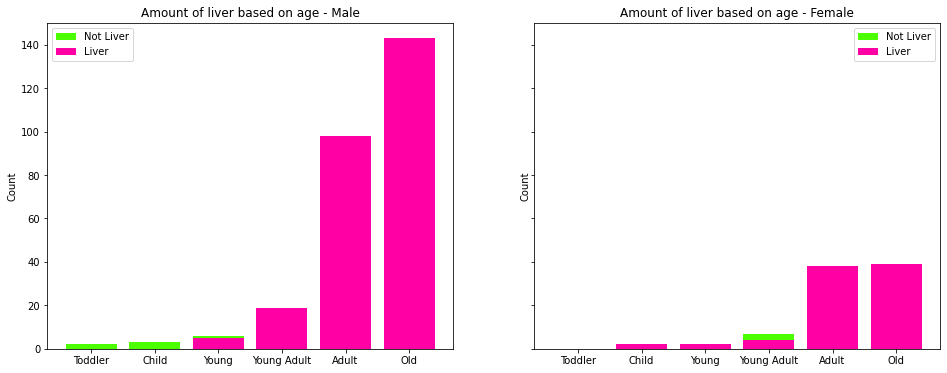

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

for i, gen in enumerate(['Male', 'Female']):
    agesNliver = df[(df['Liver_Problem'] == 2) & (df['Gender'] == gen)]['Age'].value_counts(sort=False)
    agesYliver = df[(df['Liver_Problem'] == 1) & (df['Gender'] == gen)]['Age'].value_counts(sort=False)

    ax[i].bar(agesNliver.index, agesNliver.values, label='Not Liver', color=palette[2])
    ax[i].bar(agesYliver.index, agesYliver.values, label='Liver', color=palette[1])

    ax[i].set_ylabel('Count')
    ax[i].set_title(f'Amount of liver based on age - {gen}')
    ax[i].legend()

plt.show()

**PLOT SHOWS THAT THE LIVER PROBLEM INCREASE WITH INCREASE IN TOTAL_BILIRUBIN VALUE BILIRUBIN VALUE >10 THE LIVER PROBLEM IS MUCH MORE**

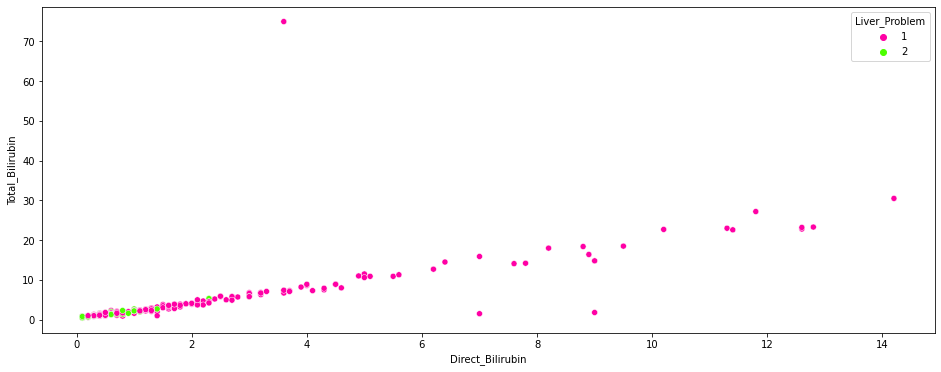

In [ ]:
fig = plt.figure(figsize=(16, 6))
sns.scatterplot(x='Direct_Bilirubin', y='Total_Bilirubin', hue='Liver_Problem', data=df, palette=palette)
plt.show()

**PLOT SHOWS THAT THE LIVER PROBLEM INCREASE WITH INCREASE IN TOTAL_BILIRUBIN VALUE AND DIRECT_BULIRUBIN
VALUE >6**

**THE LIVER PROBLEM IS MUCH MORE**

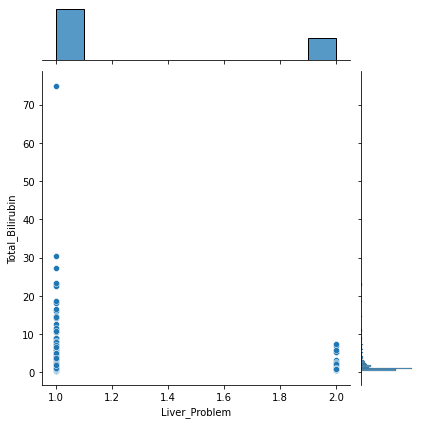

In [ ]:
sns.jointplot(x='Liver_Problem',y="Total_Bilirubin",data=df)

**dISPLOT SHOWS THE RELATION BETWEEN TOTAL PROTIENS AND LIVER PROBLEMS**

THE GRAPH SHOWS IF THE TOTAL PROTIEN LEVEL IS 3 AND LESS THERE IS LIVER PROBLEMS AND IF THE PROTIEN LEVEL IS GREATER THAN 8 LIVER PROBLEM IS MORE

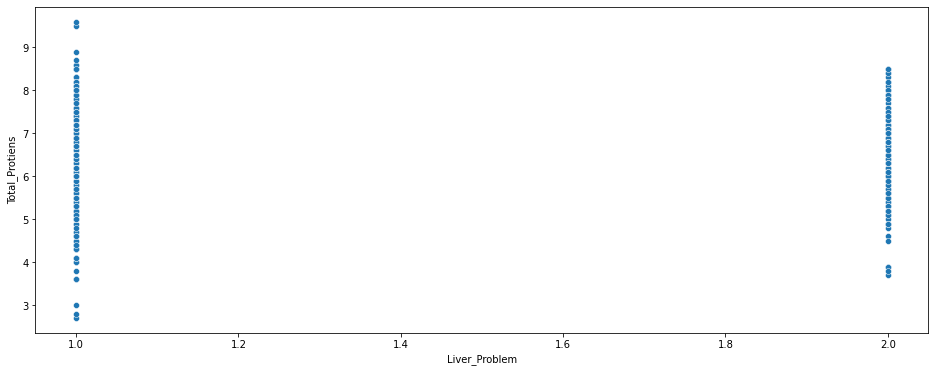

In [ ]:
fig = plt.figure(figsize=(16, 6))
sns.scatterplot(x='Liver_Problem', y='Total_Protiens', data=df)
plt.show()

# **DATA PREPROCESSING**

In [ ]:
df = df[df['Direct_Bilirubin'] < df['Total_Bilirubin']]
df = df[df['Total_Bilirubin'] < 70]
df = df[df['Aspartate_Aminotransferase'] < 4000]
df = df[df['Alamine_Aminotransferase'] < 1900]

In [ ]:
df.shape

(494, 11)

In [ ]:
df.reset_index(drop=True,inplace=True)

# **FEATURE ENGINEERING**

In [ ]:
y=df['Liver_Problem']
x=df.drop(columns='Liver_Problem')

In [ ]:
def datacols(x):
  numgender=x["Gender"].replace({"Male":1,"Female":0})
  numage=pd.get_dummies(x['Age'])
  from sklearn.preprocessing import StandardScaler
  numVar=x.drop(columns=['Age','Gender'])
  ss=StandardScaler()
  numVar = pd.DataFrame(ss.fit_transform(numVar), columns=numVar.columns)

  return pd.concat([numgender,numage,numVar],axis=1,join="inner")

In [ ]:
x=datacols(x)

# **PROCESSING THE MODEL**

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42,shuffle=True)

# **LOGISTIC REGRESSION MODEL**

In [ ]:
lr=LogisticRegression()

In [ ]:
SMT = SMOTE(random_state=42)
x_train_SMOTE, y_train_SMOTE = SMT.fit_resample(x_train, y_train)

# **APPLYING GRID SEARCH AND PREDICTING THE MODEL USING LOGISTIC REGRESSION**

In [ ]:
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': range(100, 800, 100)}
LogReg = GridSearchCV(lr, params)
LogReg.fit(x_train, y_train)
y_pred = LogReg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

# **ACCURACY AND CLASSIFICATION REPORT OF THE MODEL USING LOGISTIC REGESSION**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.71      0.92      0.80       112
           2       0.53      0.19      0.28        52

    accuracy                           0.69       164
   macro avg       0.62      0.56      0.54       164
weighted avg       0.65      0.69      0.64       164



THE ACCURACY OF THE MODEL IS 69% 

In [ ]:
print(accuracy_score(y_test,y_pred))

0.6890243902439024


In [ ]:
LogReg.best_params_

{'C': 10, 'max_iter': 100}

# **DECISION TREE CLASSIFICATION**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.77      0.75       112
           2       0.45      0.40      0.42        52

    accuracy                           0.65       164
   macro avg       0.59      0.59      0.59       164
weighted avg       0.64      0.65      0.65       164



ACCURACY OF THE MODEL IS 59%

In [ ]:
print(accuracy_score(y_test,y_pred))

0.6524390243902439


In [ ]:
!pip install graphviz

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
dot_data= export_graphviz(dtc, out_file=None,
feature_names=x_test.columns,
class_names=['0', '1'],
filled=True, rounded=True,
special_characters=True)

In [ ]:
graph1=graphviz.Source(dot_data)

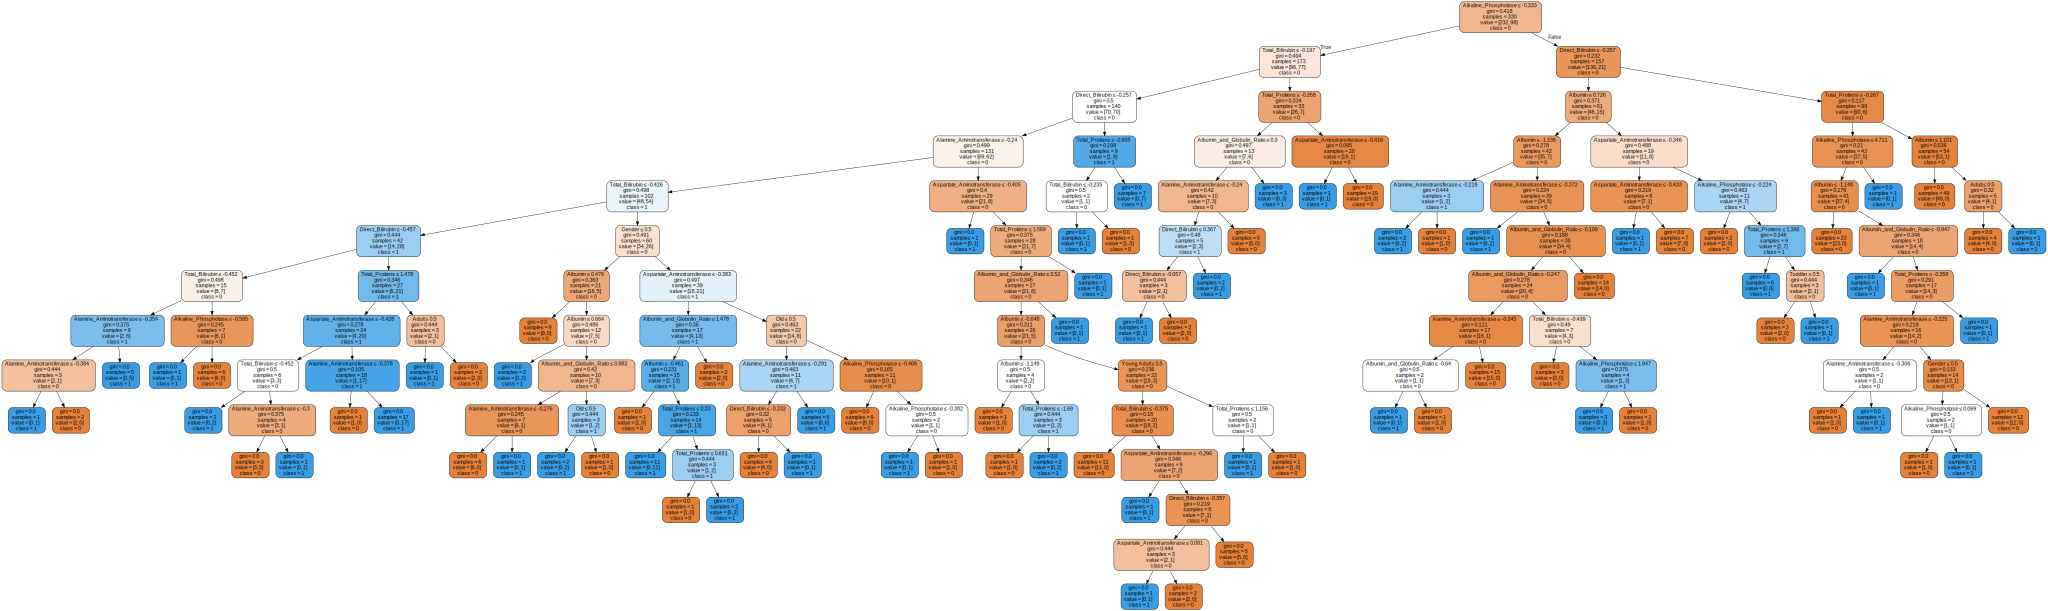

In [ ]:
graph1

# **RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.73      0.89      0.80       112
           2       0.56      0.29      0.38        52

    accuracy                           0.70       164
   macro avg       0.64      0.59      0.59       164
weighted avg       0.67      0.70      0.67       164



In [ ]:
accuracy_score(y_test,y_pred)

0.7012195121951219

In [ ]:
confusion_matrix(y_test,y_pred)

array([[100,  12],
       [ 37,  15]])

In [ ]:
testDf = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_new_testdataset.csv')
testDf.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,36,Male,2.8,1.5,305,28,76,5.9,2.5,0.7
1,42,Male,0.8,0.2,127,29,30,4.9,2.7,1.2
2,53,Male,19.8,10.4,238,39,221,8.1,2.5,0.4
3,32,Male,30.5,17.1,218,39,79,5.5,2.7,0.9
4,32,Male,32.6,14.1,219,95,235,5.8,3.1,1.1


In [ ]:
bins= [0, 5, 12, 18, 26, 46, testDf['Age'].max()+1]
labels = ['Toddler', 'Child', 'Young', 'Young Adult', 'Adult', 'Old']
testDf['Age'] = pd.cut(testDf['Age'], bins=bins, labels=labels, right=False)

In [ ]:
X_test = datacols(testDf)
y_test = pd.Series(LogReg.predict(X_test), name='prediction')

In [ ]:
y_test.to_csv('subbu.csv', index=False)